In [3]:
# Import + Cleaning + Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# file paths to the .csv.gz files
path_bcn = "../data/listings_bcn.csv.gz"
path_lis = "../data/listings_lis.csv.gz"


def load_listings(path):
    """
    Load only the variables needed for our analysis.
    We include room_type so we can narrow the dataset later.
    """
    cols = ['id', 'host_id', 'room_type']


    # pandas can read .csv.gz automatically
    df = pd.read_csv(path, usecols=cols)


    # remove listings where host_id is missing
    df = df.dropna(subset=['host_id'])
    return df


df_bcn = load_listings(path_bcn)
df_lis = load_listings(path_lis)


df_bcn.shape, df_lis.shape  # quick check


df_bcn = df_bcn[df_bcn["room_type"] == "Entire home/apt"]
df_lis = df_lis[df_lis["room_type"] == "Entire home/apt"]


df_bcn.shape, df_lis.shape  # check reduced dataset sizes

# count how many listings each host owns (after filtering)
hosts_bcn = df_bcn.groupby('host_id')['id'].count()
hosts_lis = df_lis.groupby('host_id')['id'].count()


hosts_bcn.head(), hosts_lis.head()

(host_id
 10704    24
 18378     1
 26970     1
 44384     1
 67353     1
 Name: id, dtype: int64,
 host_id
 14455     1
 70933     1
 107347    1
 125768    5
 126415    1
 Name: id, dtype: int64)

In [4]:
# count how many listings each host owns (after filtering)
hosts_bcn = df_bcn.groupby('host_id')['id'].count()
hosts_lis = df_lis.groupby('host_id')['id'].count()

hosts_bcn.head(), hosts_lis.head()

(host_id
 10704    24
 18378     1
 26970     1
 44384     1
 67353     1
 Name: id, dtype: int64,
 host_id
 14455     1
 70933     1
 107347    1
 125768    5
 126415    1
 Name: id, dtype: int64)

In [5]:
def categorize_host(n):
    """
    Classify a host based on how many listings they own.
    These categories help us measure market concentration.
    """
    if n == 1:
        return "1 (Particular)"
    elif 2 <= n <= 4:
        return "2-4 (Small investor)"
    elif 5 <= n <= 19:
        return "5-19 (Medium business)"
    else:
        return "20+ (Large landlord)"


In [6]:
bcn_cats = hosts_bcn.apply(categorize_host)
lis_cats = hosts_lis.apply(categorize_host)


In [7]:
# total number of listings per city
total_bcn = hosts_bcn.sum()
total_lis = hosts_lis.sum()

# compute shares of each category (percentage of all listings)
bcn_share = hosts_bcn.groupby(bcn_cats).sum() / total_bcn * 100
lis_share = hosts_lis.groupby(lis_cats).sum() / total_lis * 100

# ensure correct category order
categories = [
    "1 (Particular)",
    "2-4 (Small investor)",
    "5-19 (Medium business)",
    "20+ (Large landlord)"
]

bcn_plot = bcn_share.reindex(categories)
lis_plot = lis_share.reindex(categories)


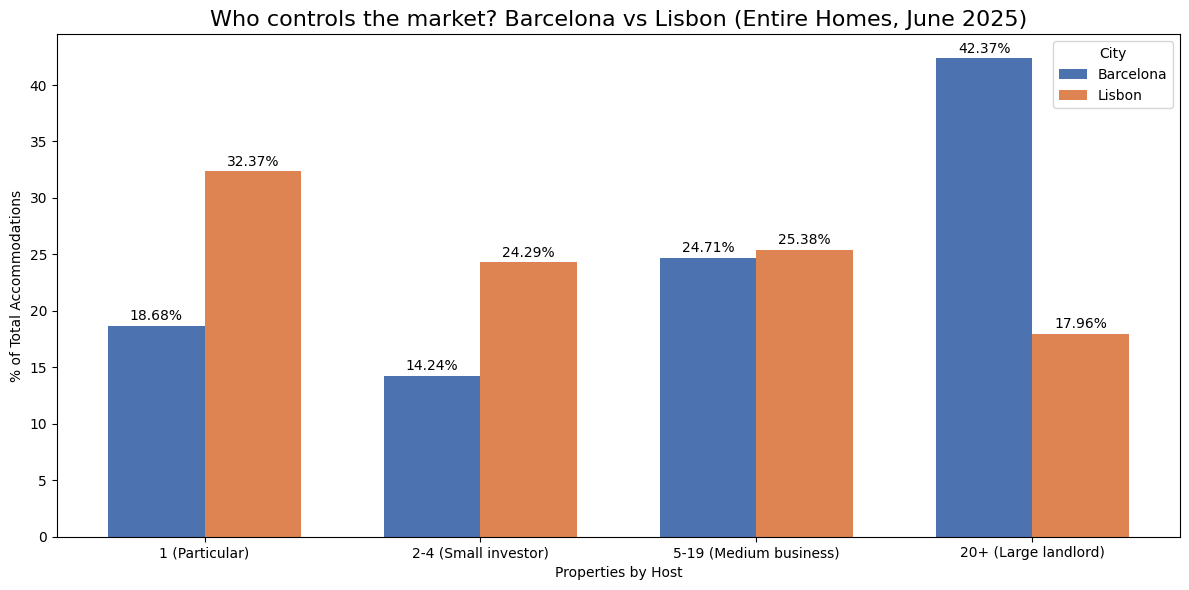

In [8]:
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(12,6))

# bars for Barcelona and Lisbon
plt.bar(x - width/2, bcn_plot, width, label="Barcelona", color="#4c72b0")
plt.bar(x + width/2, lis_plot, width, label="Lisbon", color="#dd8452")

# percentage labels above bars
for i, value in enumerate(bcn_plot):
    plt.text(i - width/2, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

for i, value in enumerate(lis_plot):
    plt.text(i + width/2, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# labels & formatting
plt.title("Who controls the market? Barcelona vs Lisbon (Entire Homes, June 2025)", fontsize=16)
plt.ylabel("% of Total Accommodations")
plt.xlabel("Properties by Host")
plt.xticks(x, categories)
plt.legend(title="City")

plt.tight_layout()

# required by the project instructions
plt.savefig("../reports/graph3.png", dpi=300)

plt.show()

